In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://www-us.apache.org/dist/spark/spark-3.1.1/spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.1.1-bin-hadoop2.7.tgz

In [ ]:
!pip install -q findspark

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.1-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("UMKC Spring 2021 Hackathon")\
        .config('spark.ui.port', '4050')\
        .getOrCreate()

In [ ]:
spark

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
get_ipython().system_raw('./ngrok http 4050 &')
!curl -s http://localhost:4040/api/tunnels

--2021-04-21 01:47:30--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.223.71.232, 34.203.109.182, 54.209.238.187, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.223.71.232|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13828408 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  33.8MB/s    in 0.4s    

2021-04-21 01:47:32 (33.8 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13828408/13828408]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
{"tunnels":[],"uri":"/api/tunnels"}


In [ ]:
df = spark.read.csv("/content/covid19vaccinesbycounty.csv", header=True, inferSchema=True)

In [ ]:
df.createOrReplaceTempView("CovidView")

In [ ]:
df

DataFrame[county: string, administered_date: string, total_doses: int, cumulative_total_doses: int, pfizer_doses: int, cumulative_pfizer_doses: int, moderna_doses: int, cumulative_moderna_doses: int, jj_doses: int, cumulative_jj_doses: int, partially_vaccinated: int, total_partially_vaccinated: int, fully_vaccinated: int, cumulative_fully_vaccinated: int, at_least_one_dose: int, cumulative_at_least_one_dose: int, california_flag: string]

In [ ]:
import os
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from io import BytesIO
from pyspark.sql import SparkSession
from pyspark.sql.functions import udf
from pyspark.sql.types import *
from shapely.geometry import Point
from textblob import TextBlob

In [ ]:
matplotlib.use('Agg')

In [ ]:
query_1 = spark.sql(
      "SELECT sum(pfizer_doses) as pfizer,sum(moderna_doses) as moderna,sum(jj_doses) as JJ, month(administered_date) as month from CovidView group by month")

In [ ]:
pd = query_1.toPandas()
pd.to_csv('Query1.csv', index=False)

In [ ]:
pd.plot.pie(y="pfizer", labels=pd.month.tolist(), autopct='%1.2f%%',shadow=False, legend=False, fontsize=8)
plt.title("Pfizer distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('graph1_1.png')

In [ ]:
pd.plot.pie(y="moderna", labels=pd.month.tolist(), autopct='%1.2f%%',shadow=False, legend=False, fontsize=8)
plt.title("Moderna Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('graph1_2.png')

In [ ]:
pd.plot.pie(y="JJ", labels=pd.month.tolist(), autopct='%1.2f%%',shadow=False, legend=False, fontsize=8)
plt.title("JJ Distribution")
plt.axis('equal')
plt.tight_layout()
plt.show()
plt.savefig('graph1_3.png')

In [ ]:
query_2=spark.sql("SELECT max(pfizer_doses) as pfizer,max(moderna_doses) as moderna,max(jj_doses) as JJ, month(administered_date) as month from CovidView group by month")

In [ ]:
pd = query_2.toPandas()
pd.to_csv('Query2.csv', index=False)

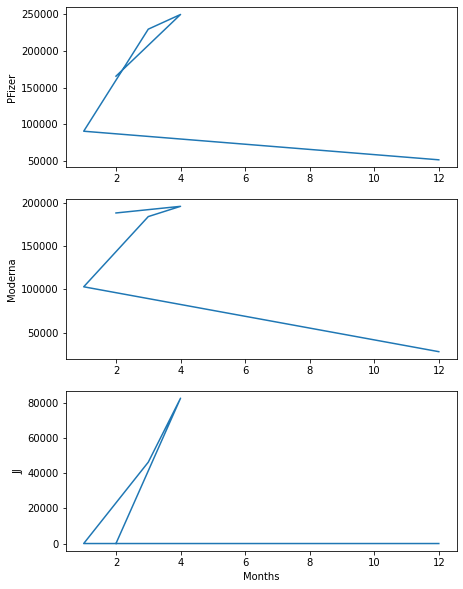

In [ ]:
fig,[ax1,ax2,ax3]=plt.subplots(nrows=3,ncols=1, figsize=(7,10))
ax1.plot(list(pd.month),pd.pfizer.tolist())

ax1.set(ylabel='PFizer')
ax2.plot(pd.month.tolist(),pd.moderna.tolist())
ax2.set(ylabel='Moderna')
ax3.plot(pd.month.tolist(),pd.JJ.tolist())
ax3.set(xlabel='Months')
ax3.set(ylabel='JJ');

In [ ]:
fig.show()

In [ ]:
plt.plot()

[]

In [ ]:
%matplotlib inline